In [1]:
#!conda install -n mldds -c anaconda joblib
import os
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='once')

import multiprocessing
num_cores = multiprocessing.cpu_count()

print("Cores: ", num_cores)

import time
import keras
import tensorflow as tf
config = tf.ConfigProto( device_count = {'GPU': 0 , 'CPU': num_cores} )
sess = tf.Session(config=config) 
keras.backend.set_session(sess)

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

from MyTotoResearch import *

Cores:  12


/Users/walter/Software/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
Using TensorFlow backend.
/Users/walter/Software/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py:923: DeprecationWarning: builtin type EagerTensor has no __module__ attribute
  EagerTensor = c_api.TFE_Py_InitEagerTensor(_EagerTensorBase)
/Users/walter/Software/anaconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)
/Users/walter/Software/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/Users/walter/Software/anaconda3/lib/python3.6/site-packages/tensorflow/pyth

Done.


In [2]:

def getAllData(df):
    drop_cols = ['T', 'D', 'N1','N2','N3','N4','N5','N6','N7','L','M','S','R','E','A','V' ,'J','U','K']
    X = df.drop(drop_cols, axis=1)
    return X



In [3]:
def store_prediction(mrt, model, f, scaler=None, name='unnamed'):
    def getAllData(df):
        drop_cols = ['T', 'L','M','S','R','E','A','V' ,'J','U','K']
        X = df.drop(drop_cols, axis=1)
        return X

    test_data = mtr.get_test_data()
    X = mtr.modified_dataset(getAllData(test_data)) #
#    X = getAdjustedDataF(test_data,f)


    if ( scaler == None ):
        Z = X
    else:
        scaler.fit(X)
        Z = scaler.transform(X)

    predictions = model.predict(Z)

    dfResult= pd.DataFrame(predictions, columns=['N1', 'N2', 'N3', 'N4', 'N5','N6', 'N7'])
#    mtr.print_predictions(dfResult)

    global df_predictions
    global prev_r
    r = mtr.getAccuracyCount(np.array(dfResult)) ;
#    if ( r > prev_r ):
#        df_predictions = []
    df_predictions.append(dfResult)
    g_all_pred.update({name : dfResult})



In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from keras.models import Input, Model
import keras
from keras.layers import Dense
import time
from keras.models import Sequential
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint, History
import json as simplejson
from keras import regularizers
from sklearn import preprocessing
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, RandomForestClassifier, ExtraTreesRegressor, ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVR

from sklearn.linear_model import SGDRegressor, SGDClassifier, LogisticRegression, PassiveAggressiveClassifier, Perceptron, RidgeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet, Ridge, RidgeClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.svm import SVC, SVR, LinearSVC
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

seed = 42

mtr = MyTotoResearch(algo_no=1)
lresult, df = mtr.load_totodata()

df_predictions = []


all_models = []

all_models.append(('SVCpoly01', SVC(kernel='poly', coef0=0.05, probability=True, degree=2, random_state=seed)))
all_models.append(('SVCrbf010', SVC(kernel='rbf', coef0=0.75, probability=True, degree=2, random_state=seed)))
# all_models.append(('SVCrbf011', SVC(kernel='rbf', coef0=0.5, probability=True, degree=2, random_state=seed)))
# all_models.append(('SVCrbf012', SVC(kernel='rbf', coef0=0.25, probability=True, degree=2, random_state=seed)))

# all_models.append(('SVCrbf0103', SVC(kernel='rbf', coef0=0.75, probability=True, degree=3, random_state=seed)))
# all_models.append(('SVCrbf0113', SVC(kernel='rbf', coef0=0.5, probability=True, degree=3, random_state=seed)))
# all_models.append(('SVCrbf0123', SVC(kernel='rbf', coef0=0.25, probability=True, degree=3, random_state=seed)))


all_models.append(('SVCrbf020', SVC(kernel='sigmoid', coef0=0.75, probability=True, degree=2, random_state=seed)))
# all_models.append(('SVCrbf021', SVC(kernel='sigmoid', coef0=0.5, probability=True, degree=2, random_state=seed)))
# all_models.append(('SVCrbf022', SVC(kernel='sigmoid', coef0=0.25, probability=True, degree=2, random_state=seed)))

# all_models.append(('SVCrbf0203', SVC(kernel='sigmoid', coef0=0.75, probability=True, degree=3, random_state=seed)))
# all_models.append(('SVCrbf0213', SVC(kernel='sigmoid', coef0=0.5, probability=True, degree=3, random_state=seed)))
# all_models.append(('SVCrbf0223', SVC(kernel='sigmoid', coef0=0.25, probability=True, degree=3, random_state=seed)))


# all_models.append(('SVCrbf030', SVC(kernel='linear', coef0=0.75, probability=True, degree=2, random_state=seed)))
# all_models.append(('SVCrbf031', SVC(kernel='linear', coef0=0.5, probability=True, degree=2, random_state=seed)))
# all_models.append(('SVCrbf032', SVC(kernel='linear', coef0=0.25, probability=True, degree=2, random_state=seed)))

# all_models.append(('SVCrbf0303', SVC(kernel='linear', coef0=0.75, probability=True, degree=3, random_state=seed)))
# all_models.append(('SVCrbf0313', SVC(kernel='linear', coef0=0.5, probability=True, degree=3, random_state=seed)))
# all_models.append(('SVCrbf0323', SVC(kernel='linear', coef0=0.25, probability=True, degree=3, random_state=seed)))



# all_models.append(('LR', (LogisticRegression(random_state=seed))))

all_models.append(('KNNC', KNeighborsClassifier()))
#all_models.append(('KNNR', KNeighborsRegressor()))
all_models.append(('RC', RidgeClassifier(random_state=seed)))
# all_models.append(('LR', LogisticRegression(random_state=seed)))
# all_models.append(('LDA', LinearDiscriminantAnalysis()))
# all_models.append(('DTR', DecisionTreeRegressor()))
# all_models.append(('ETR', ExtraTreesRegressor(n_estimators=5)))
all_models.append(('ETC', ExtraTreesClassifier(n_estimators=5)))
# all_models.append(('EN', ElasticNet()))
all_models.append(('CART', DecisionTreeClassifier()))
# all_models.append(('NB', GaussianNB()))
# all_models.append(('Lasso', Lasso()))
# all_models.append(('GBR', GradientBoostingRegressor()))
all_models.append(('RFR5', RandomForestClassifier(n_estimators=5, n_jobs=5, random_state=seed)))
# all_models.append(('RFR5', RandomForestClassifier(n_estimators=5, n_jobs=5, random_state=seed)))
# all_models.append(('RFR3', RandomForestRegressor(n_estimators=3, n_jobs=5, random_state=seed)))
# all_models.append(('SGDR', SGDRegressor(random_state=seed)))
all_models.append(('AdaB', AdaBoostClassifier(RandomForestClassifier(n_estimators=3))))
# #all_models.append(('MLPC', MLPClassifier(hidden_layer_sizes=(500,500,500), max_iter=2000, alpha=0.001, activation='tanh', learning_rate='adaptive', solver='sgd', verbose=0,  random_state=42,tol=0.000000001)))



Loaded MyTotoResearch algo_no:  1
1521


In [15]:
# evaluate each model in turn
from sklearn import model_selection
results = []
names = []
scoring = 'accuracy'

g_all_pred = {}

for name, model in all_models:
    
    X = mtr.modified_dataset(getAllData(df)) #
    f = 1.0 #365/27.58
#    X = getAdjustedDataF(df,f)

    scaler = StandardScaler()
    scaler.fit(X)
    Z = scaler.transform(X)
    
#    scaler = None
#    Z = X

#     kfold = model_selection.KFold(n_splits=3, random_state=seed)
#     cv_results = model_selection.cross_val_score(model, Z, mtr.getTarget(3), cv=kfold, scoring=scoring)
#     results.append(cv_results)
#     names.append(name)
#     msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
#     print(msg)
    
    oClassifier = MultiOutputClassifier(model, n_jobs=7)
    oClassifier.fit(Z, mtr.getTargets()) 
    print(oClassifier)
    s = oClassifier.score(Z, mtr.getTargets())
    if(oClassifier.score(Z, mtr.getTargets()) == 1.0):
        print( name, ' ', str(f), ' ', str(s))
    store_prediction(mtr, oClassifier, f, scaler=scaler, name=name)
    start = time.clock()
    print(str(f), " Time taken: ", (time.clock() - start),  " ")

# for n in range(len(df_predictions)):
#     print( mtr.getAccuracyCount(np.array(df_predictions[n])))
#     mtr.print_predictions(df_predictions[n])






# boxplot algorithm comparison
# fig = plt.figure()
# fig.suptitle('Algorithm Comparison')
# ax = fig.add_subplot(111)
# plt.boxplot(results)
# ax.set_xticklabels(names)
# plt.show()

print('Done')

/Users/walter/Software/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/walter/Software/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


MultiOutputClassifier(estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.05,
  decision_function_shape='ovr', degree=2, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=True, random_state=42,
  shrinking=True, tol=0.001, verbose=False),
           n_jobs=7)


/Users/walter/Software/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/walter/Software/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()
/Users/walter/Software/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/walter/Software/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


1.0  Time taken:  1.100000000064938e-05  
MultiOutputClassifier(estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.75,
  decision_function_shape='ovr', degree=2, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=42,
  shrinking=True, tol=0.001, verbose=False),
           n_jobs=7)


/Users/walter/Software/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/walter/Software/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()
/Users/walter/Software/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/walter/Software/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


1.0  Time taken:  8.000000001118224e-06  
MultiOutputClassifier(estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.75,
  decision_function_shape='ovr', degree=2, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=True, random_state=42,
  shrinking=True, tol=0.001, verbose=False),
           n_jobs=7)


/Users/walter/Software/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/walter/Software/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()
/Users/walter/Software/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/walter/Software/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


1.0  Time taken:  9.999999999621423e-06  
MultiOutputClassifier(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
           n_jobs=7)


/Users/walter/Software/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/walter/Software/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()
/Users/walter/Software/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/walter/Software/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
/Users/walter/Software/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype i

1.0  Time taken:  9.999999999621423e-06  
MultiOutputClassifier(estimator=RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=42, solver='auto',
        tol=0.001),
           n_jobs=7)
1.0  Time taken:  8.999999998593466e-06  
MultiOutputClassifier(estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
           n_jobs=7)
ETC   1.0   1.0


/Users/walter/Software/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/walter/Software/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()
/Users/walter/Software/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/walter/Software/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


1.0  Time taken:  8.999999998593466e-06  
MultiOutputClassifier(estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
           n_jobs=7)
CART   1.0   1.0
1.0  Time taken:  9.999999999621423e-06  


/Users/walter/Software/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/walter/Software/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()
/Users/walter/Software/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/walter/Software/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


MultiOutputClassifier(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=5,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
           n_jobs=7)


/Users/walter/Software/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/walter/Software/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()
/Users/walter/Software/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/walter/Software/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


1.0  Time taken:  9.00000000214618e-06  
MultiOutputClassifier(estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min...e=0,
            warm_start=False),
          learning_rate=1.0, n_estimators=50, random_state=None),
           n_jobs=7)
AdaB   1.0   1.0


/Users/walter/Software/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/walter/Software/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()


1.0  Time taken:  7.000000000090267e-06  
Done


import operator
from itertools import islice

top_n = 12

all_pred = [] ;
for i in range(len(df_predictions)):
    if ( i == 0 ):
        all_pred = df_predictions[i]
    else:
        all_pred = np.column_stack((all_pred, df_predictions[i]) )

top_seven = []
for i in range(len(all_pred)):
    unique, counts = np.unique(all_pred[i], return_counts=True)
    x = dict(zip(unique, counts))
    sorted_x = sorted(x.items(), key=operator.itemgetter(1), reverse=True) # sorted by value
    top_seven.append(list(islice([int(x) for x,y in sorted_x],top_n)))

#print(top_seven)
columns = ['N'+str(i+1) for i in range(top_n)]
df_top_seven = pd.DataFrame(top_seven, columns=columns)
r = mtr.getAccuracyCount(np.array(df_top_seven)) ;
print ( "Accuracy: ",  r)
#print(df_top_seven)
# matched = []
# for (p,a) in zip(df_top_seven.values, mtr.get_test_result()):
#     matched.append(len(set(p.astype(int)) & set(a)))
# bins = np.arange(8) - 0.5
# plt.hist(matched, bins, rwidth=0.8)
# plt.xticks(range(8))
# plt.xlim([-1, 8])
# plt.show()


mtr.plot_matched_counts(df_top_seven.values)


#mtr.print_predictions(df_top_seven)




In [6]:
def combine_prediction(arr, initial_pred=[]):
    global s
    if ( isinstance(arr, list) ):
        for a in arr:
            combine_prediction(a, initial_pred)
        return 
    if ( len(s) > 1 ):
        s += '_'
    s += arr
    initial_pred.append(g_all_pred[arr])
    return 



In [16]:
import itertools
from itertools import combinations
import operator 
from itertools import islice

name_ = []

lst = [name for name, model in all_models]
iBestIndex = -1
iBestN = []
#print("List ", lst)
top_n = 12


dict_accuracy = {}
for z in range(5, 0,-1):
    a = [list(x) for x in itertools.combinations(lst, z) if len(x) > 1 ] 
#    print(a)

    for xx in a:
        test_pred = []
        s = ''
        combine_prediction(xx, test_pred)
#        print(s)

        #print(len(test_pred))

        all_pred = [] ;
        for i in range(len(test_pred)):
            if ( i == 0 ):
                all_pred = test_pred[i]
            else:
                all_pred = np.column_stack((all_pred, test_pred[i]) )

        top_seven = []
        for i in range(len(all_pred)):
            unique, counts = np.unique(all_pred[i], return_counts=True)
            x = dict(zip(unique, counts))
            sorted_x = sorted(x.items(), key=operator.itemgetter(1), reverse=True) # sorted by value
            l = list(islice([int(x) for x,y in sorted_x],top_n))
            while ( len(l) < top_n ):
                l.append(-1)

            top_seven.append(l)
            

#        print(len(top_seven))
#         if(len(top_seven[0]) < top_n ):
#             print("*** Caught ", )
        columns = ['N'+str(i+1) for i in range(len(top_seven[0]))]
#        print(columns)
        df_top_seven = pd.DataFrame(top_seven, columns=columns)
        r = mtr.getAccuracyCount(np.array(df_top_seven)) ;
        matched, weighted_match = mtr.print_weighted_numbers(df_top_seven.values)
        r = sum(weighted_match)

        dict_accuracy.update({s: r})

t_accuracy = sorted(dict_accuracy.items(),key=operator.itemgetter(1), reverse=True)
print('Done')


Done


In [8]:
matched, weighted_match = mtr.print_weighted_numbers(df_top_seven.values)
print(matched)
print(weighted_match)

[1, 2, 2, 1, 1, 1, 0, 2, 2, 1, 2, 0, 0, 2, 0, 1, 2, 1, 7, 0, 1, 1, 1, 0, 1, 2, 1, 2, 1, 3, 3, 3, 3, 3, 2, 1, 2, 2, 3, 2, 2, 3, 1, 1, 3, 1, 3, 4, 2, 1, 2, 1, 1]
[1.2, 1.4, 1.4, 1.2, 1.2, 1.2, 1.0, 1.4, 1.4, 1.2, 1.4, 1.0, 1.0, 1.4, 1.0, 1.2, 1.4, 1.2, 2.4, 1.0, 1.2, 1.2, 1.2, 1.0, 1.2, 1.4, 1.2, 1.4, 1.2, 1.6, 1.6, 1.6, 1.6, 1.6, 1.4, 1.2, 1.4, 1.4, 1.6, 1.4, 1.4, 1.6, 1.2, 1.2, 1.6, 1.2, 1.6, 1.8, 1.4, 1.2, 1.4, 1.2, 1.2]


[('CART_RFR5_AdaB', 73.80000000000003), ('SVCpoly01_ETC_CART', 73.8), ('RC_RFR5_AdaB', 73.60000000000002), ('SVCrbf020_CART_RFR5', 73.40000000000003), ('SVCrbf010_CART_RFR5', 73.40000000000002), ('RC_ETC_CART', 73.4), ('SVCpoly01_CART_RFR5', 73.2)]
[['CART', 'RFR5', 'AdaB'], ['SVCpoly01', 'ETC', 'CART'], ['RC', 'RFR5', 'AdaB'], ['SVCrbf020', 'CART', 'RFR5'], ['SVCrbf010', 'CART', 'RFR5'], ['RC', 'ETC', 'CART'], ['SVCpoly01', 'CART', 'RFR5']]
Accuracy:  94.33962264150944


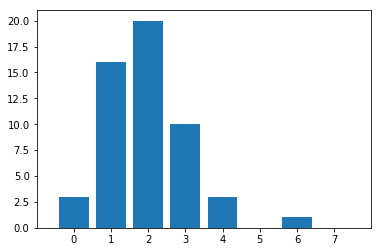

Accuracy:  92.45283018867924


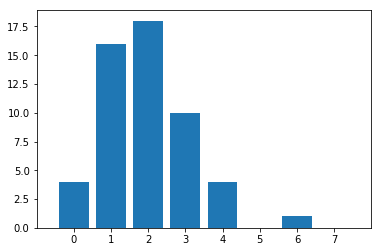

Accuracy:  86.79245283018868


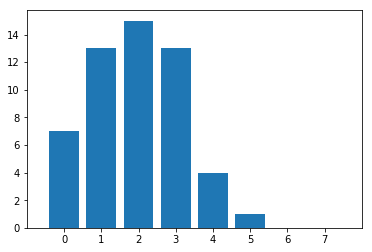

Accuracy:  96.22641509433963


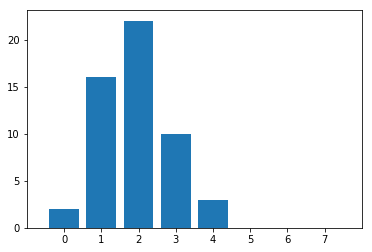

Accuracy:  92.45283018867924


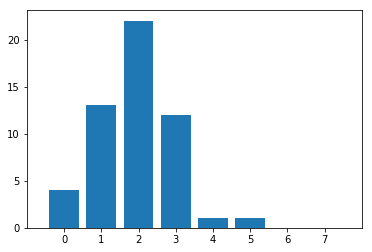

Accuracy:  88.67924528301887


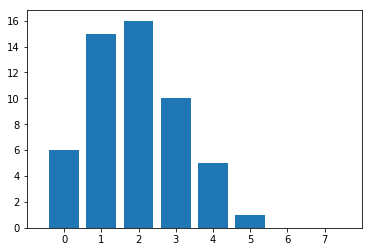

Accuracy:  90.56603773584906


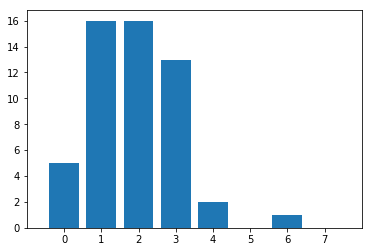

In [17]:
n = 7
print(t_accuracy[:n])

a = [x[0].split('_') for x in t_accuracy[:n] ] 
print(a)
for xx in a:
    test_pred = []
    s = ''
    combine_prediction(xx, test_pred)
    all_pred = [] ;
    for i in range(len(test_pred)):
        if ( i == 0 ):
            all_pred = test_pred[i]
        else:
            all_pred = np.column_stack((all_pred, test_pred[i]) )

    top_seven = []
    for i in range(len(all_pred)):
        unique, counts = np.unique(all_pred[i], return_counts=True)
        x = dict(zip(unique, counts))
        sorted_x = sorted(x.items(), key=operator.itemgetter(1), reverse=True) # sorted by value
        l = list(islice([int(x) for x,y in sorted_x],top_n))
        while ( len(l) < top_n ):
          l.append(-1)
        top_seven.append(l)


    columns = ['N'+str(i+1) for i in range(len(top_seven[0]))]
    df_top_seven = pd.DataFrame(top_seven, columns=columns)
    r = mtr.getAccuracyCount(np.array(df_top_seven)) ;
    print ( "Accuracy: ",  r)
    dict_accuracy.update({s: r})
    mtr.plot_matched_counts(df_top_seven.values)





def get_class_weights(y):
    counter = Counter(y)
    majority = max(counter.values())
    return  {cls: round(float(majority)/float(count), 2) for cls, count in counter.items()}


prev_r = 0

mtr = MyTotoResearch(algo_no=1)
lresult, df = mtr.load_totodata()

#Deep Neuro Network
for n in range(1,2):
    X = mtr.modified_dataset(getAllData(df)) #
    f = 1.0 #365/27.58
#    X = getAdjustedDataF(df,f)

    scaler = StandardScaler()
    scaler.fit(X)
    Z = scaler.transform(X)

    clf = SGDClassifier(random_state=42)

    model = MultiOutputClassifier(clf, n_jobs=7)
    model.fit(Z, mtr.getTargets()) 
    print(model)
    s = model.score(Z, mtr.getTargets())
    if(model.score(Z, mtr.getTargets()) == 1.0):
        print( str(f), ' ', str(s))
    store_prediction(mtr, model, f)
    start = time.clock()
    print(str(f), " Time taken: ", (time.clock() - start),  " ")

print("Done.")
# mtr = MyTotoResearch(algo_no=1)
# lresult, df = mtr.load_totodata()

# test_data = mtr.get_test_data()

for n in range(len(df_predictions)):
    print( mtr.getAccuracyCount(np.array(df_predictions[n])))
    mtr.print_predictions(df_predictions[n])


#69.81 => MLPClassifier(hidden_layer_sizes=(500,500,500), max_iter=2000, alpha=0.001, activation='relu', learning_rate='adaptive', solver='sgd', verbose=0,  random_state=42,tol=0.000000001)
#75.47 =>  MLPClassifier(hidden_layer_sizes=(500,500,500), max_iter=2000, alpha=0.001, activation='tanh', learning_rate='adaptive', solver='sgd', verbose=0,  random_state=42,tol=0.000000001)
#64.15 =>  MLPClassifier(hidden_layer_sizes=(500,500,500), max_iter=2000, alpha=0.001, activation='tanh', learning_rate='adaptive', solver='adam', verbose=0,  random_state=42,tol=0.000000001)
#62  MLPClassifier(hidden_layer_sizes=(500,500,500), max_iter=2000, alpha=0.001, activation='tanh', learning_rate='adaptive', solver='lbfgs', verbose=0,  random_state=42,tol=0.000000001)
#71.69 => MLPClassifier(hidden_layer_sizes=(500,500,500), max_iter=2000, alpha=0.001, activation='logistic', learning_rate='adaptive', solver='lbfgs', verbose=0,  random_state=42,tol=0.000000001)

#75.47 => SVC(kernel='poly', coef0=0.05, probability=True, degree=2, random_state=42, tol=1e-03)



#69.81 => SVC(random_state=42)



In [10]:

# Nov 26
# 16 22 28 31 38 46 33

In [18]:
#Keep track of all results
#df_predictions = []

#print(df_predictions)
#mtr = MyTotoResearch(algo_no=1)
def getAllData(df):
    drop_cols = ['T', 'L','M','S','R','E','A','V' ,'J','U','K']
    X = df.drop(drop_cols, axis=1)
    return X

lresult, df = mtr.load_totodata()

test_data = mtr.get_test_data()
X = mtr.modified_dataset(getAllData(test_data)) #

print(len(df_predictions))
for n in range(len(df_predictions)):
    print( mtr.getAccuracyCount(np.array(df_predictions[n])))
    mtr.print_predictions(df_predictions[n])



1521
9
60.37735849056604
20180514   [17 24 29 45 46 49  5]   [16. 21. 22. 24. 25. 27.]   [24]
20180517   [ 7 21 25 29 35 37 13]   [16. 17. 34. 40. 44. 45.]   []
20180521   [ 8 10 16 30 37 44 17]   [ 6.  9. 15. 18. 40. 43.]   []
20180524   [11 25 26 34 36 42 16]   [15. 17. 20. 23. 30. 45.]   []
20180528   [ 5  9 27 28 30 44  2]   [ 4.  5. 13. 18. 39. 40.]   [5]
20180531   [11 13 24 26 47 49 33]   [ 9. 27. 29. 31. 40. 44.]   []
20180604   [20 22 31 37 43 45 27]   [ 6. 16. 22. 26. 29. 38.]   [22]
20180607   [12 20 29 31 37 39 42]   [ 3. 19. 23. 30. 39. 41.]   [39]
20180611   [16 25 30 37 44 49 34]   [ 9. 10. 25. 38. 40. 42.]   [25]
20180614   [ 4 29 31 35 42 48  1]   [22. 23. 25. 32. 33. 36.]   []
20180618   [11 15 22 23 26 43 25]   [ 3.  6. 16. 17. 22. 36.]   [22]
20180621   [ 4  6 15 24 30 35 46]   [16. 20. 23. 28. 39. 42.]   []
20180625   [ 2  5 25 38 44 48  9]   [15. 18. 20. 27. 36. 40.]   []
20180628   [ 2  7 22 27 40 47 48]   [10. 15. 27. 28. 41. 43.]   [27]
20180702   [12 13 26 33 

20180816   [22 23 25 32 33 36 20]   [ 8. 15. 23. 31. 34. 43.]   [23]
20180820   [ 9 10 25 38 40 42  2]   [ 8. 15. 22. 27. 41. 43.]   []
20180823   [ 2  3 23 30 39 41 19]   [ 8. 15. 25. 32. 33. 43.]   []
20180827   [ 5  6 16 24 26 29 38]   [ 8. 17. 25. 32. 36. 45.]   []
20180830   [ 3  9 27 29 31 40 46]   [ 8. 16. 22. 31. 39. 43.]   [31]
20180903   [ 4  5 13 18 39 40  3]   [10. 17. 30. 31. 36. 45.]   []
20180906   [ 2 15 17 20 23 30 45]   [10. 16. 25. 31. 38. 45.]   [45]
20180910   [ 2  6  9 15 40 43 18]   [10. 18. 25. 31. 37. 44.]   [18]
20180913   [ 6 16 17 40 44 48 34]   [10. 18. 25. 31. 41. 45.]   []
20180917   [16 21 22 24 25 27  1]   [11. 15. 19. 31. 36. 45.]   []
20180920   [ 5 12 18 30 32 38 22]   [11. 18. 24. 31. 37. 45.]   [18]
20180924   [ 6  8 17 24 29 47 34]   [ 6. 18. 17. 31. 41. 44.]   [ 6 17]
20180927   [ 2 25 29 33 42 45 20]   [10. 18. 17. 31. 36. 44.]   []
20181001   [11 15 23 24 32 40 43]   [ 9. 18. 17. 31. 41. 44.]   []
20181004   [ 5 12 23 32 37 42 43]   [ 7. 18. 17

20181025   [ 7  8 13 15 35 48 30]   [11. 13. 25. 37. 41. 44.]   [13]
20181029   [ 2  6 10 20 28 31 30]   [ 8. 20. 22. 28. 41. 41.]   [20 28]
20181101   [ 6 27 28 41 44 48 15]   [ 8. 15. 22. 27. 34. 45.]   [15 27]
20181105   [ 3  8 14 28 43 49 26]   [ 8. 20. 29. 32. 41. 45.]   [8]
20181108   [ 8 13 16 26 28 38 46]   [ 8. 20. 25. 28. 36. 45.]   [ 8 28]
20181112   [ 4 12 21 34 41 47 33]   [ 8. 20. 22. 28. 36. 45.]   []
20181115  Predicted:  [ 8. 20. 25. 29. 41. 45.]  
20181119  Predicted:  [ 6. 15. 27. 31. 39. 41.]  
20181122  Predicted:  [ 9. 14. 23. 31. 36. 45.]  
20181126  Predicted:  [ 8. 12. 20. 21. 35. 44.]  
20181129  Predicted:  [ 7. 12. 16. 21. 34. 41.]  
20181203  Predicted:  [ 8. 12. 24. 31. 34. 45.]  
20181206  Predicted:  [ 6. 18. 26. 31. 34. 44.]  
20181210  Predicted:  [ 6. 13. 30. 31. 35. 44.]  
20181213  Predicted:  [ 9. 20. 30. 31. 36. 45.]  
20181217  Predicted:  [ 9. 13. 22. 31. 36. 44.]  
20181220  Predicted:  [ 9. 18. 28. 33. 37. 44.]  
20181224  Predicted:  [ 6. 13.

20180604   [20 22 31 37 43 45 27]   [ 6.  7.  9. 26. 24. 38.]   []
20180607   [12 20 29 31 37 39 42]   [ 3.  8.  7. 30. 23. 31.]   [31]
20180611   [16 25 30 37 44 49 34]   [ 5.  9. 14. 12. 30. 43.]   [30]
20180614   [ 4 29 31 35 42 48  1]   [11.  6. 25. 32. 33. 36.]   []
20180618   [11 15 22 23 26 43 25]   [ 7. 11. 13. 17. 22. 36.]   [11 22]
20180621   [ 4  6 15 24 30 35 46]   [ 5. 14. 22. 26. 21. 36.]   []
20180625   [ 2  5 25 38 44 48  9]   [ 6. 18.  8. 20. 36. 42.]   []
20180628   [ 2  7 22 27 40 47 48]   [10. 13. 27. 38. 22. 29.]   [22 27]
20180702   [12 13 26 33 35 38 23]   [ 8.  5. 17. 37. 25. 29.]   []
20180705   [ 8 11 28 30 32 34 39]   [ 6. 13. 17. 28. 37. 40.]   [28]
20180709   [ 6 23 31 38 39 43 33]   [12. 23.  9. 28. 39. 40.]   [23 39]
20180712   [ 4 15 25 32 40 41 10]   [ 7. 13. 35. 22. 45. 40.]   [40]
20180716   [ 4  8 19 24 32 47 22]   [19. 11. 22. 24. 26. 38.]   [19 22 24]
20180719   [13 14 23 35 37 46 45]   [10. 15. 26. 18. 33. 49.]   []
20180723   [ 2 23 26 28 39 40 1